In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sb
import random
# from sklearn.tree import convert_to_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz



%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

In [3]:
iris = datasets.load_iris()
#Transformando a un dataframe de pandas
datos = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#Cambiandole los nombres a las columnas
datos.columns=["Sepal.length","Sepal.width","Petal.length","Petal.width","Specie"]
datos

,Sepal.length,Sepal.width,Petal.length,Petal.width,Specie
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Saber cuantas filas hay de cada categoría

In [4]:
datos.groupby('Specie').size()

Specie
0.0    50
1.0    50
2.0    50
dtype: int64

### Es importante saber que está balanceado el conjunto de datos en la variable de la respuesta

In [5]:
datos['Specie'] = datos['Specie'].astype('category')

In [6]:

y = datos.pop("Specie") #La variable respuesta
X = datos #El resto de los datos

random.seed(123)




# Estableciendo los conjuntos de Entrenamiento y Prueba

In [7]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

70% de entrenamiento y 30% prueba

In [8]:
arbol = DecisionTreeClassifier(max_depth=4, random_state=42) 
arbol = arbol.fit(X_train, y_train) 

[Text(0.5, 0.9, 'Petal.length <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [35, 37, 33]\nclass = 1'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = 0'),
 Text(0.46153846153846156, 0.8, 'True  '),
 Text(0.5769230769230769, 0.7, 'Petal.width <= 1.75\ngini = 0.498\nsamples = 70\nvalue = [0, 37, 33]\nclass = 1'),
 Text(0.5384615384615384, 0.8, '  False'),
 Text(0.3076923076923077, 0.5, 'Petal.length <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = 1'),
 Text(0.15384615384615385, 0.3, 'Petal.width <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = 1'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = 1'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = 2'),
 Text(0.46153846153846156, 0.3, 'Petal.width <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = 2'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass

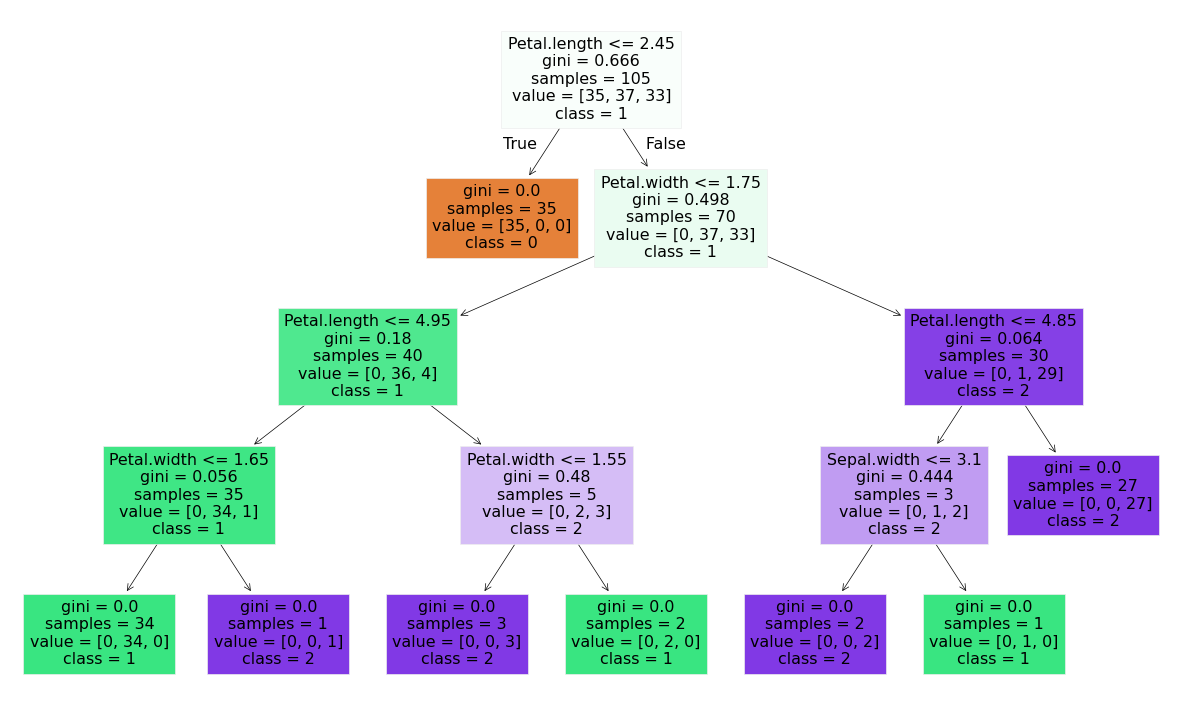

In [9]:
tree.plot_tree(arbol,feature_names=datos.columns,
               class_names=['0','1','2'],filled=True )

In [10]:
y_pred = arbol.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))


Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall:  0.9777777777777777
